# Rachunek macierzowy - mnożenie macierzy

**Wykonali: Alicja Niewiadomska, Paweł Kruczkiewicz**


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import time


Wybrano temat nr 3, czyli *dla macierzy mniejszych lub równych 2^l x 2^l mnożenie rekurencyjne metodą Bineta, dla większych - Strassena*.


Wybrane algorytmy macierzowe:
 1. Mnożenie rekurencyjne metodą Bineta.
 2. Mnożenie rekurencyjne metodą Strassena.
 

## Pseudokod rozwiązania

Zakładamy, że dana macierz ma wymiary 2^k x 2^k.

Dane: 
  - `A`, `B` - macierze kwadratowe o rozmiarze 2^k
  - `k` - wyżej wspomniany wykładnik
  - `l` - arbitralnie wybrana eksponenta wartości progowej dla danego algorytmu.
  
Wartość zwracana: 
   `C` - wynikowa macierz kwadratowa o rozmiarze 2^k
```
def mat_mul(A, B, k, l):
    if k <= l:
        return binet_rec_mat_mul(A, B, k, l)
    else:
        return strass_mat_mul(A, B, k, l)
```

## Kod algorytmu

### Funkcje pomocnicze

In [6]:
def split_matrix_in_quarters(A: np.array):
    half_i = A.shape[0] // 2
    return  A[:half_i, :half_i], \
            A[:half_i, half_i:], \
            A[half_i:, :half_i],\
            A[half_i:, half_i:]
            
def join_matrices(A11, A12, A21, A22):
    A1 = np.hstack((A11, A12))
    A2 = np.hstack((A21, A22))
    return np.vstack((A1, A2))

### Algorytm rekurencyjny Bineta

In [7]:
def binet_rec_mat_mul(A: np.array, B: np.array, k: int, l: int) -> np.array:
    if k == 0:
        return A*B
    
    rec_step = lambda A1, B1, A2, B2: mat_mul(A1, B1, k-1, l) + mat_mul(A2, B2, k-1, l)

    A11, A12, A21, A22 = split_matrix_in_quarters(A)
    B11, B12, B21, B22 = split_matrix_in_quarters(B)
    
    C11 = rec_step(A11, B11, A12, B21)
    C12 = rec_step(A11, B12, A12, B22)
    C21 = rec_step(A21, B11, A22, B21)
    C22 = rec_step(A21, B12, A22, B22)
    
    return join_matrices(C11, C12, C21, C22)

### Algorytm rekurencyjny Strassena

In [8]:
def strassen_mat_mul(A: np.array, B: np.array, k: int, l: int) -> np.array:    
    if k == 0:
        return A*B
    
    rec_step = lambda A1, B1: mat_mul(A1, B1, k-1, l)

    A11, A12, A21, A22 = split_matrix_in_quarters(A)
    B11, B12, B21, B22 = split_matrix_in_quarters(B)

    M1 = rec_step(A11 + A22, B11 + B22)
    M2 = rec_step(A21 + A22, B11)
    M3 = rec_step(A11, B12 - B22)
    M4 = rec_step(A22, B21 - B11)
    M5 = rec_step(A11 + A12, B22)
    M6 = rec_step(A21 - A11, B11 + B12)
    M7 = rec_step(A12 - A22, B21 + B22)

    C11 = M1 + M4 - M5 + M7
    C12 = M3 + M5
    C21 = M2 + M4
    C22 = M1 - M2 + M3 + M6
    
    return join_matrices(C11, C12, C21, C22)

### Algorytm końcowy

In [9]:
def mat_mul(A, B, k, l):
    if k <= l:
        return binet_rec_mat_mul(A, B, k, l)
    else:
        return strassen_mat_mul(A, B, k, l)

## Wykresy
Wybrane wielkości parametru `l`: 4, 6, 8

In [10]:
l_values = [ 4, 6, 8 ]

In [11]:
plt.rcParams["figure.figsize"] = [15, 10]
plt.rcParams['font.size'] = 24
plt.style.use('fivethirtyeight')

### Wykres czasu mnożenia od wielkości macierzy

In [12]:
k_values = np.arange(2, 9)
num_range = 100

### kod generujący czas

def measure_mat_mul_time() -> np.array:
    times = []

    for i, k in enumerate(k_values):
        times.append([])
        for j, l in enumerate(l_values):
            size = 2**k
            A = np.random.randint(0, num_range, (size, size))
            B = np.random.randint(0, num_range, (size, size))
            print("Measuring: k=", k, " l=", l)
            
            it = 10
            start = time.time()
            for _ in range(it):
                mat_mul(A, B, k, l)
            end = time.time()
            res = (end-start)/it


            times[i].append(res)
    
    return np.array(times)

### kod wykresu

def plot_time_results(times: np.array) -> None:
    x = k_values
    x_axis = np.arange(len(x))
    
    for i, l in enumerate(l_values):
        plt.bar(x_axis + 0.1*i, times[i], 0.1, label=l)

    plt.xticks(x_axis, x)
    plt.xlabel("k (matrix size 2^k)")
    plt.ylabel("Time in log scale [s]")
    plt.yscale("log")
    plt.title("Matrices multiplication performance")
    plt.legend(title="Parameter l")
    plt.show()

Measuring: k= 2  l= 4
Measuring: k= 2  l= 6
Measuring: k= 2  l= 8
Measuring: k= 3  l= 4
Measuring: k= 3  l= 6
Measuring: k= 3  l= 8
Measuring: k= 4  l= 4
Measuring: k= 4  l= 6
Measuring: k= 4  l= 8
Measuring: k= 5  l= 4
Measuring: k= 5  l= 6
Measuring: k= 5  l= 8
Measuring: k= 6  l= 4
Measuring: k= 6  l= 6
Measuring: k= 6  l= 8
Measuring: k= 7  l= 4
Measuring: k= 7  l= 6
Measuring: k= 7  l= 8
Measuring: k= 8  l= 4
Measuring: k= 8  l= 6
Measuring: k= 8  l= 8
(7, 3)


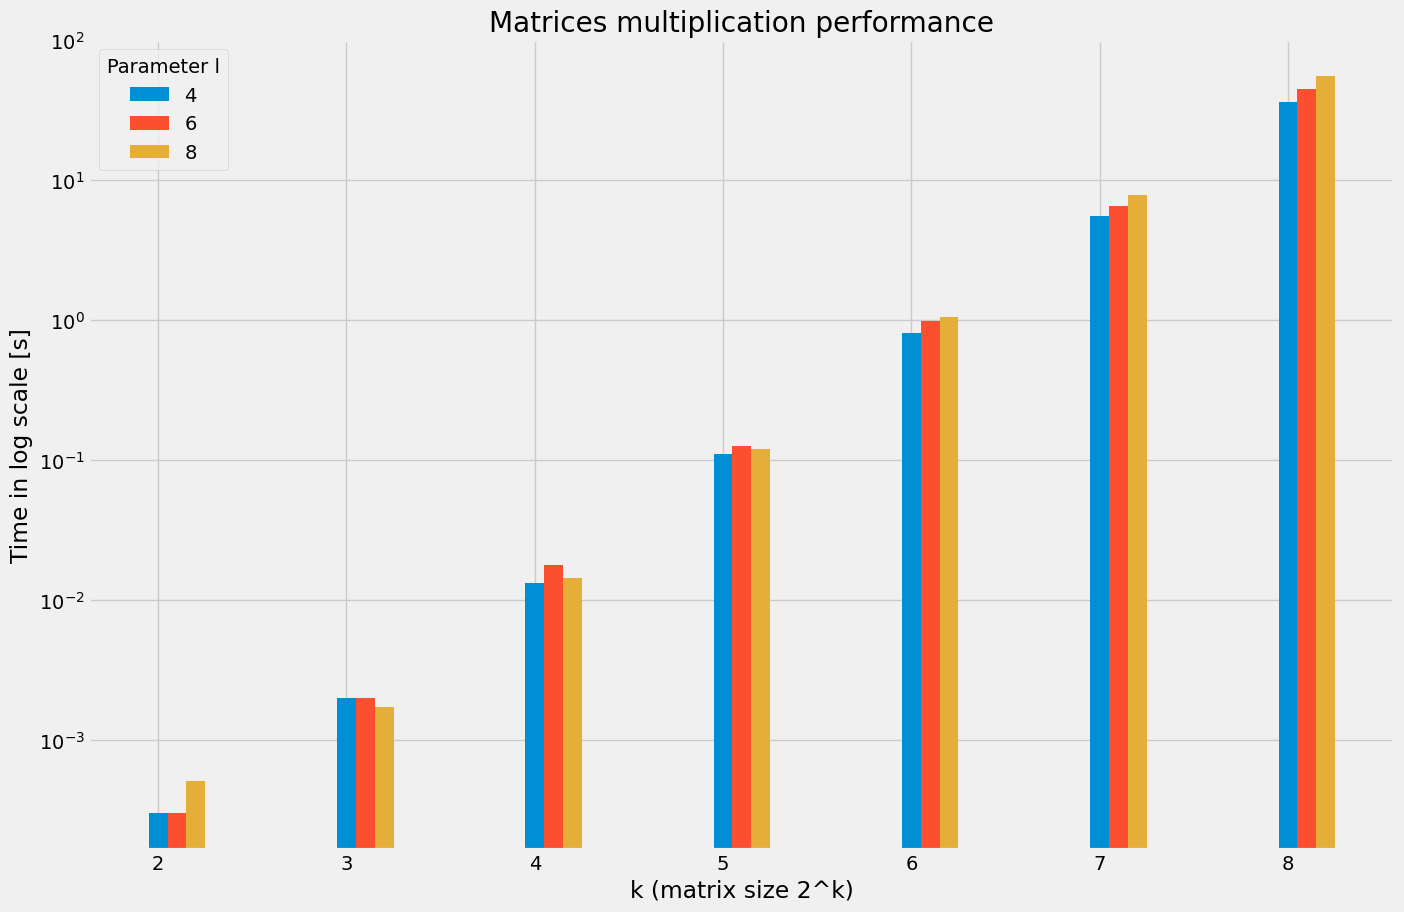

In [13]:
times = measure_mat_mul_time()
plot_time_results(times.T)

Powyższy wykres jasno pokazuje, że algorytm Strassena jest algorytmem wydajniejszym niż rekurencyjny algorytm Bineta dla każdego z przedstawionych przypadków. Można to wywnioskować po tym, że czas wykonania mnożenia tej samej macierzy jest mniejszy dla mniejszych wartości `l` (tj. gdy algorytm rekurencyjny stanowi mniejszą część obliczania macierzy).

### Wykres wykonanych obliczeń zmiennoprzecinkowych w zależności od wielkości macierzy

In [14]:
### kod generujący liczbę obliczeń zmiennoprzecinkowych

def binet_rec_mat_mul_op_count(k: int, l: int) -> int:
    if k == 0:
        return 1  # multiplying matrices
    
    n =  2**(k-1)
    rec_step_op_count = 2 * mat_mul_op_count(k-1, l) + n*n
    
    C11_op_count = rec_step_op_count
    C12_op_count = rec_step_op_count
    C21_op_count = rec_step_op_count
    C22_op_count = rec_step_op_count
    
    return C11_op_count + C12_op_count + C21_op_count + C22_op_count
    

def strassen_mat_mul_op_count(k: int, l: int) -> int:
    if k == 0:
        return 1
    
    n = 2**k
    
    rec_step_op_count = mat_mul_op_count(k-1, l)
    
    M1_op_count = rec_step_op_count + 2*(n//2)*(n//2)
    M2_op_count = rec_step_op_count + (n//2)*(n//2)
    M3_op_count = rec_step_op_count + (n//2)*(n//2)
    M4_op_count = rec_step_op_count + (n//2)*(n//2)
    M5_op_count = rec_step_op_count + (n//2)*(n//2)
    M6_op_count = rec_step_op_count + 2*(n//2)*(n//2)
    M7_op_count = rec_step_op_count + 2*(n//2)*(n//2)
    
    C11_op_count = 3*(n//2)*(n//2)
    C12_op_count = (n//2)*(n//2)
    C21_op_count = (n//2)*(n//2)
    C22_op_count = 3*(n//2)*(n//2)
    
    return C11_op_count + C12_op_count + C21_op_count + C22_op_count + M1_op_count + M2_op_count + M3_op_count + M4_op_count + M5_op_count + M6_op_count + M7_op_count

    
### kod wykresu



In [15]:
def mat_mul_op_count(k: int, l: int) -> int:
    if k <= l: 
        return binet_rec_mat_mul_op_count(k, l)
    else: 
        return strassen_mat_mul_op_count(k, l)



In [16]:
k_values = range(7, 20)
mat_mul_ops = np.array([[mat_mul_op_count(k, l) for l in l_values ] for k in k_values])

def plot_ops_results(ops: np.array) -> None:
    x = k_values
    x_axis = np.arange(len(x))
    
    for i, l in enumerate(l_values):
        plt.bar(x_axis + 0.1*i, ops[i], 0.1, label=l)

    plt.xticks(x_axis, x)
    plt.xlabel("k (matrix size 2^k)")
    plt.ylabel("Number of operations in log scale")
    plt.yscale("log")
    plt.title("Number of floating point operations")
    plt.legend(title="Parameter l")
    plt.show()
    
mat_mul_ops

array([[          3150592,           3715072,           4177920],
       [         22349056,          26300416,          33488896],
       [        157623040,         185282560,         235601920],
       [       1108079872,        1301696512,        1653932032],
       [       7775433472,        9130749952,       11596398592],
       [      54503531776,       63990747136,       81250287616],
       [     381826712320,      448237219840,      569054003200],
       [    2673994945792,     3138868498432,     3984585981952],
       [   18722796458752,    21976911327232,    27896933711872],
       [  131078902564096,   153857706643456,   195297863335936],
       [  917629627360000,  1077081255915520,  1367162352762880],
       [ 6423716629165312,  7539878029053952,  9570445706985472],
       [44967253354738432, 52780383153958912, 66994356899479552]],
      dtype=int64)

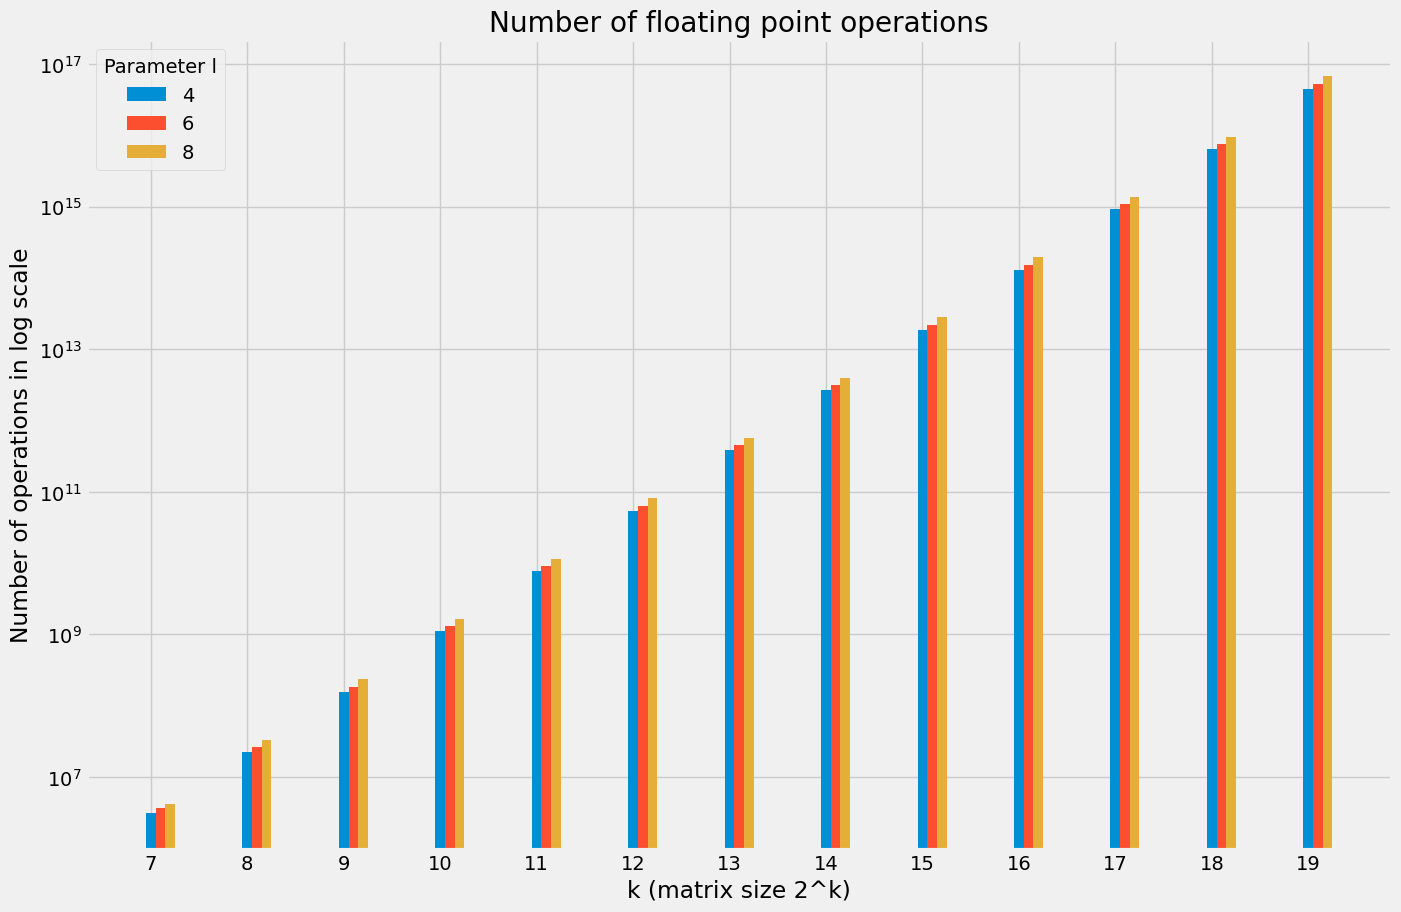

In [17]:
plot_ops_results(mat_mul_ops.T)

Na powyższym wykresie widzimy, że w każdym przypadku mniej obliczeń jest dokonywanych, kiedy używamy algorytmu Strassena a nie algorytmu rekurencyjnego. Jest to zgodne z tym, co uzyskano na wykresie czasu od wielkości macierzy, tzn. uzyskujemy wyższą wydajność dla algorytmów, gdzie mnożenie Strassena stanowi większą część algorytmu niż algorytm rekurencyjny Bineta.

Należy pamiętać, że oś Y jest osią logarytmiczną. W rzeczywistości liczba obliczeń dla macierzy o rozmiarze 2^19 byłaby niemal 1.5 raza większa dla algorytmu o `l=8` niż dla analogicznej procedury o `l=4`.

## Wnioski

W powyższym raporcie pokazano, że używanie algorytmu Strassena pozwala przyśpieszyć mnożenie macierzy w przypadku ich dużych rozmiarów. Jest to algorytm wydajniejszy dla języka Python niż algorytm rekurencyjny.

Badania można rozszerzyć o mądrzejsze używanie pamięci, co potencjalnie pokazałoby korzyści z używania rekurencyjnego wzoru Bineta na mnożenie macierzy. Niestety, jest to niemożliwe w wybranym języku programowania.